## Logic Based FizzBuzz Function [Software 1.0]

In [42]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    #checking the fizzbuzz logic using standard logic based approach.
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [43]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    #because for fizzbuzz problem we are converting inputs to binary format.So to store that data and manipulate it on
    #neural network with layers,we need python's list object.
    ##This is how we define dictionary in python for input.This is our data set.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    #To train our model for actual real time data we need training data sets
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    #To represent input and output in tabular format.Also it is very easy to do arithmatic operations on rows and columns 
    ##of dataframe(pandas library)
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [44]:
def processData(dataset):
    
    # Why do we have to process?
    ##Input only have one feature.Our input is in the form of integer.To train our model for real time data and to feed this data to neural network
    ##we need to convert it into some sort of form which model can manipulate on efficiently.So we processed it and converted it into
    ##10 digit binary number.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [45]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        ##Input is an interger,it doesn't make any sense just passing one node to neural network.So we are converting it 
        ##into binary number of 10 digits.So that we can train our model for X-input of ten features,which is much better
        ##than passing only one feature to hidden layer.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [46]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.1
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    ##We need model to run our machine learning algorithms.It get created as a result of training data process.Models are 
    ##needed to test training data,so that model can predict results of future inputs.
    
    # Why use Dense layer and then activation?
    ##A Dense layer feeds all outputs from the previous layer/dataset to all its nodes.
    ##It is very important layer to train model so that it can predict outputs of real time data accurately.
    ##Once dense layer perform all operations and we get result.We need to convert it into actual output which is needed.
    
    ##Like for given example we only need four output values.Layers don't directly give us desired result.We need to convert
    ##it into desired output type values(called class) by some function,this function is called activation function.
    ##dense layer are something which do all processing on data and train model,activation function use these
    ##processed value who don't have any bound and convert it into required result.
    ##Because of these reasons we use dense layer first and then activation function.
    
    # Why use sequential model with layers?
    ##Because we have a only one input and we need one output of label(fizz/buzz/fizzbuzz/other).This model is perfect for this type of problem,
    ##where we need only one output from one input.
    ##Sequential model only stacks layers upon previous ones sequentially like a stack or queue.- Keras Documentation
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    ##drop out is a regularisation technique which helps to avoid a problem of overfitting in neural models.It helps avoiding
    ##complex co-adaptation on training data which can affect efficiency of model on real time data.
    ##we used drop out to avoid problem of over fitting and to increase performance of our model to train on data.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    ##We need output to be of only four classes -fizz/buzz/fizzbuzz/other.For this type of problem softmax activation 
    ##function is used which will provide four outputs for given inputs.
    model.summary()
    
    # Why use categorical_crossentropy?
    ##Cross entropy is the loss function.It shows how much predicted output differ from actual output.We wish to show
    ##our output in four label which we can call categories.For this purpose we used categorical cross entropy.
    ##when using the categorical_crossentropy loss, your targets should be in categorical format 
    ##(e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is 
    ##all-zeros expect for a 1 at the index corresponding to the class of the sample).(reference-stackoverflow)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [52]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [53]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5632      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_8 (Activation)    (None, 4)                 0         
Total params: 7,684
Trainable params: 7,684
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [54]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 307us/step - loss: 1.3036 - acc: 0.4472 - val_loss: 1.1916 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 26us/step - loss: 1.1801 - acc: 0.5333 - val_loss: 1.1578 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 48us/step - loss: 1.1528 - acc: 0.5333 - val_loss: 1.1637 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 25us/step - loss: 1.1534 - acc: 0.5333 - val_loss: 1.1608 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 24us/step - loss: 1.1486 - acc: 0.5333 - val_loss: 1.1531 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 21us/step - loss: 1.1456 - acc: 0.5333 - val_loss: 1.1472 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 21us/step - loss: 1.1389 - acc: 0.5333 - val_loss: 1.1474 - val_acc: 0.5333
E

720/720 [==============================] - 0s 22us/step - loss: 0.9595 - acc: 0.5583 - val_loss: 1.0908 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 22us/step - loss: 0.9606 - acc: 0.5569 - val_loss: 1.0859 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 20us/step - loss: 0.9510 - acc: 0.5597 - val_loss: 1.0838 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 21us/step - loss: 0.9489 - acc: 0.5653 - val_loss: 1.0810 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 20us/step - loss: 0.9370 - acc: 0.5667 - val_loss: 1.0777 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 20us/step - loss: 0.9356 - acc: 0.5611 - val_loss: 1.0774 - val_acc: 0.5333
Epoch 66/10000
720/720 [==============================] - 0s 19us/step - loss: 0.9319 - acc: 0.5569 - val_loss: 1.0746 - val_acc: 0.5333
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 18us/step - loss: 0.6677 - acc: 0.7889 - val_loss: 0.9119 - val_acc: 0.6611
Epoch 121/10000
720/720 [==============================] - 0s 24us/step - loss: 0.6605 - acc: 0.7778 - val_loss: 0.9090 - val_acc: 0.6500
Epoch 122/10000
720/720 [==============================] - 0s 22us/step - loss: 0.6508 - acc: 0.7764 - val_loss: 0.9074 - val_acc: 0.6667
Epoch 123/10000
720/720 [==============================] - 0s 19us/step - loss: 0.6457 - acc: 0.8125 - val_loss: 0.9047 - val_acc: 0.6778
Epoch 124/10000
720/720 [==============================] - 0s 23us/step - loss: 0.6417 - acc: 0.7958 - val_loss: 0.9004 - val_acc: 0.6778
Epoch 125/10000
720/720 [==============================] - 0s 20us/step - loss: 0.6471 - acc: 0.7903 - val_loss: 0.8970 - val_acc: 0.6778
Epoch 126/10000
720/720 [==============================] - 0s 22us/step - loss: 0.6414 - acc: 0.7694 - val_loss: 0.8935 - val_acc: 0.6667
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 22us/step - loss: 0.4479 - acc: 0.8972 - val_loss: 0.7270 - val_acc: 0.8056
Epoch 180/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4308 - acc: 0.9153 - val_loss: 0.7274 - val_acc: 0.7944
Epoch 181/10000
720/720 [==============================] - 0s 20us/step - loss: 0.4230 - acc: 0.9069 - val_loss: 0.7240 - val_acc: 0.7889
Epoch 182/10000
720/720 [==============================] - 0s 24us/step - loss: 0.4257 - acc: 0.9139 - val_loss: 0.7196 - val_acc: 0.8000
Epoch 183/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4248 - acc: 0.9194 - val_loss: 0.7183 - val_acc: 0.8000
Epoch 184/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4179 - acc: 0.9083 - val_loss: 0.7173 - val_acc: 0.7944
Epoch 185/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4178 - acc: 0.9250 - val_loss: 0.7105 - val_acc: 0.8167
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 21us/step - loss: 0.2971 - acc: 0.9500 - val_loss: 0.5979 - val_acc: 0.8667
Epoch 239/10000
720/720 [==============================] - 0s 24us/step - loss: 0.2927 - acc: 0.9528 - val_loss: 0.5927 - val_acc: 0.8667
Epoch 240/10000
720/720 [==============================] - 0s 24us/step - loss: 0.2941 - acc: 0.9528 - val_loss: 0.5866 - val_acc: 0.8500
Epoch 241/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2880 - acc: 0.9597 - val_loss: 0.5847 - val_acc: 0.8667
Epoch 242/10000
720/720 [==============================] - 0s 21us/step - loss: 0.2852 - acc: 0.9444 - val_loss: 0.5877 - val_acc: 0.8556
Epoch 243/10000
720/720 [==============================] - 0s 23us/step - loss: 0.2841 - acc: 0.9528 - val_loss: 0.5846 - val_acc: 0.8611
Epoch 244/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3070 - acc: 0.9431 - val_loss: 0.5816 - val_acc: 0.8611
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.2240 - acc: 0.9667 - val_loss: 0.5108 - val_acc: 0.8833
Epoch 298/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2262 - acc: 0.9583 - val_loss: 0.5026 - val_acc: 0.9000
Epoch 299/10000
720/720 [==============================] - 0s 21us/step - loss: 0.2338 - acc: 0.9514 - val_loss: 0.5042 - val_acc: 0.9056
Epoch 300/10000
720/720 [==============================] - 0s 21us/step - loss: 0.2247 - acc: 0.9639 - val_loss: 0.4987 - val_acc: 0.9000
Epoch 301/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2133 - acc: 0.9639 - val_loss: 0.4927 - val_acc: 0.8833
Epoch 302/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2136 - acc: 0.9694 - val_loss: 0.4960 - val_acc: 0.8944
Epoch 303/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2263 - acc: 0.9583 - val_loss: 0.5018 - val_acc: 0.8944
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 20us/step - loss: 0.1715 - acc: 0.9750 - val_loss: 0.4450 - val_acc: 0.9111
Epoch 357/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1670 - acc: 0.9764 - val_loss: 0.4440 - val_acc: 0.9222
Epoch 358/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1832 - acc: 0.9681 - val_loss: 0.4418 - val_acc: 0.9000
Epoch 359/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1745 - acc: 0.9653 - val_loss: 0.4521 - val_acc: 0.9056
Epoch 360/10000
720/720 [==============================] - 0s 19us/step - loss: 0.1694 - acc: 0.9764 - val_loss: 0.4415 - val_acc: 0.9000
Epoch 361/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1706 - acc: 0.9764 - val_loss: 0.4385 - val_acc: 0.9000
Epoch 362/10000
720/720 [==============================] - 0s 19us/step - loss: 0.1841 - acc: 0.9625 - val_loss: 0.4398 - val_acc: 0.9167
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 24us/step - loss: 0.1397 - acc: 0.9764 - val_loss: 0.4079 - val_acc: 0.9222
Epoch 416/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1576 - acc: 0.9653 - val_loss: 0.4086 - val_acc: 0.9167
Epoch 417/10000
720/720 [==============================] - 0s 25us/step - loss: 0.1383 - acc: 0.9792 - val_loss: 0.4065 - val_acc: 0.9222
Epoch 418/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1592 - acc: 0.9639 - val_loss: 0.4027 - val_acc: 0.9278
Epoch 419/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1499 - acc: 0.9653 - val_loss: 0.4085 - val_acc: 0.9444
Epoch 420/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1516 - acc: 0.9819 - val_loss: 0.3983 - val_acc: 0.9111
Epoch 421/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1437 - acc: 0.9694 - val_loss: 0.3985 - val_acc: 0.9111
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.1231 - acc: 0.9806 - val_loss: 0.3979 - val_acc: 0.9389
Epoch 475/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1337 - acc: 0.9736 - val_loss: 0.3745 - val_acc: 0.9278
Epoch 476/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1210 - acc: 0.9736 - val_loss: 0.3757 - val_acc: 0.9333
Epoch 477/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1279 - acc: 0.9778 - val_loss: 0.3967 - val_acc: 0.9222
Epoch 478/10000
720/720 [==============================] - 0s 21us/step - loss: 0.1130 - acc: 0.9819 - val_loss: 0.3732 - val_acc: 0.9389
Epoch 479/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1436 - acc: 0.9694 - val_loss: 0.4017 - val_acc: 0.9167
Epoch 480/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1243 - acc: 0.9778 - val_loss: 0.3706 - val_acc: 0.9111
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.0971 - acc: 0.9889 - val_loss: 0.3494 - val_acc: 0.9389
Epoch 534/10000
720/720 [==============================] - 0s 23us/step - loss: 0.1199 - acc: 0.9736 - val_loss: 0.3370 - val_acc: 0.9333
Epoch 535/10000
720/720 [==============================] - 0s 25us/step - loss: 0.1245 - acc: 0.9722 - val_loss: 0.3444 - val_acc: 0.9389
Epoch 536/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1176 - acc: 0.9750 - val_loss: 0.3342 - val_acc: 0.9278
Epoch 537/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1085 - acc: 0.9750 - val_loss: 0.3317 - val_acc: 0.9333
Epoch 538/10000
720/720 [==============================] - 0s 20us/step - loss: 0.1328 - acc: 0.9653 - val_loss: 0.3398 - val_acc: 0.9444
Epoch 539/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1002 - acc: 0.9861 - val_loss: 0.3426 - val_acc: 0.9278
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 20us/step - loss: 0.1008 - acc: 0.9736 - val_loss: 0.3225 - val_acc: 0.9333
Epoch 593/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1020 - acc: 0.9792 - val_loss: 0.3268 - val_acc: 0.9444
Epoch 594/10000
720/720 [==============================] - 0s 19us/step - loss: 0.0925 - acc: 0.9833 - val_loss: 0.3272 - val_acc: 0.9500
Epoch 595/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0876 - acc: 0.9861 - val_loss: 0.3285 - val_acc: 0.9500
Epoch 596/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1097 - acc: 0.9708 - val_loss: 0.3209 - val_acc: 0.9500
Epoch 597/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0923 - acc: 0.9889 - val_loss: 0.3197 - val_acc: 0.9444
Epoch 598/10000
720/720 [==============================] - 0s 19us/step - loss: 0.1059 - acc: 0.9736 - val_loss: 0.3217 - val_acc: 0.9500
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 23us/step - loss: 0.0754 - acc: 0.9889 - val_loss: 0.3301 - val_acc: 0.9444
Epoch 652/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0861 - acc: 0.9847 - val_loss: 0.3140 - val_acc: 0.9444
Epoch 653/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0841 - acc: 0.9819 - val_loss: 0.3181 - val_acc: 0.9444
Epoch 654/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0807 - acc: 0.9875 - val_loss: 0.3104 - val_acc: 0.9444
Epoch 655/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0939 - acc: 0.9736 - val_loss: 0.3066 - val_acc: 0.9389
Epoch 656/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0986 - acc: 0.9792 - val_loss: 0.3342 - val_acc: 0.9278
Epoch 657/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0742 - acc: 0.9903 - val_loss: 0.3202 - val_acc: 0.9444
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.0726 - acc: 0.9847 - val_loss: 0.3341 - val_acc: 0.9389
Epoch 711/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0938 - acc: 0.9750 - val_loss: 0.3037 - val_acc: 0.9333
Epoch 712/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0742 - acc: 0.9847 - val_loss: 0.3112 - val_acc: 0.9667
Epoch 713/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0853 - acc: 0.9847 - val_loss: 0.2980 - val_acc: 0.9500
Epoch 714/10000
720/720 [==============================] - 0s 18us/step - loss: 0.0766 - acc: 0.9833 - val_loss: 0.2968 - val_acc: 0.9278
Epoch 715/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0685 - acc: 0.9889 - val_loss: 0.3046 - val_acc: 0.9444
Epoch 716/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0686 - acc: 0.9931 - val_loss: 0.3089 - val_acc: 0.9333
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.0646 - acc: 0.9861 - val_loss: 0.2976 - val_acc: 0.9389
Epoch 770/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0694 - acc: 0.9875 - val_loss: 0.3032 - val_acc: 0.9444
Epoch 771/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0679 - acc: 0.9903 - val_loss: 0.3057 - val_acc: 0.9556
Epoch 772/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0790 - acc: 0.9819 - val_loss: 0.3067 - val_acc: 0.9222
Epoch 773/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0683 - acc: 0.9833 - val_loss: 0.3001 - val_acc: 0.9500
Epoch 774/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0719 - acc: 0.9889 - val_loss: 0.3016 - val_acc: 0.9556
Epoch 775/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0630 - acc: 0.9931 - val_loss: 0.2982 - val_acc: 0.9500
Epoch 776/10000
720/720 [=========================

720/720 [==============================] - 0s 24us/step - loss: 0.0682 - acc: 0.9819 - val_loss: 0.2802 - val_acc: 0.9556
Epoch 829/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0696 - acc: 0.9819 - val_loss: 0.2817 - val_acc: 0.9556
Epoch 830/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0581 - acc: 0.9931 - val_loss: 0.2933 - val_acc: 0.9667
Epoch 831/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0619 - acc: 0.9875 - val_loss: 0.2878 - val_acc: 0.9611
Epoch 832/10000
720/720 [==============================] - 0s 19us/step - loss: 0.0707 - acc: 0.9875 - val_loss: 0.3033 - val_acc: 0.9611
Epoch 833/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0732 - acc: 0.9806 - val_loss: 0.2895 - val_acc: 0.9500
Epoch 834/10000
720/720 [==============================] - 0s 19us/step - loss: 0.0736 - acc: 0.9847 - val_loss: 0.2908 - val_acc: 0.9500
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.0495 - acc: 0.9931 - val_loss: 0.2940 - val_acc: 0.9667
Epoch 888/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0562 - acc: 0.9889 - val_loss: 0.2981 - val_acc: 0.9667
Epoch 889/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0534 - acc: 0.9958 - val_loss: 0.2849 - val_acc: 0.9667
Epoch 890/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0615 - acc: 0.9917 - val_loss: 0.2815 - val_acc: 0.9389
Epoch 891/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0665 - acc: 0.9750 - val_loss: 0.2877 - val_acc: 0.9444
Epoch 892/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0666 - acc: 0.9861 - val_loss: 0.2996 - val_acc: 0.9556
Epoch 893/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0616 - acc: 0.9861 - val_loss: 0.2881 - val_acc: 0.9500
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 21us/step - loss: 0.0725 - acc: 0.9847 - val_loss: 0.2775 - val_acc: 0.9611
Epoch 947/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0618 - acc: 0.9875 - val_loss: 0.2734 - val_acc: 0.9556
Epoch 948/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0528 - acc: 0.9875 - val_loss: 0.2930 - val_acc: 0.9667
Epoch 949/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0721 - acc: 0.9833 - val_loss: 0.2857 - val_acc: 0.9667
Epoch 950/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0670 - acc: 0.9833 - val_loss: 0.2750 - val_acc: 0.9667
Epoch 951/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0556 - acc: 0.9875 - val_loss: 0.2873 - val_acc: 0.9556
Epoch 952/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0587 - acc: 0.9889 - val_loss: 0.2807 - val_acc: 0.9611
Epoch 953/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.0593 - acc: 0.9861 - val_loss: 0.2821 - val_acc: 0.9667
Epoch 1006/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0495 - acc: 0.9847 - val_loss: 0.2752 - val_acc: 0.9667
Epoch 1007/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0516 - acc: 0.9903 - val_loss: 0.2633 - val_acc: 0.9667
Epoch 1008/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0534 - acc: 0.9889 - val_loss: 0.2575 - val_acc: 0.9667
Epoch 1009/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0556 - acc: 0.9903 - val_loss: 0.2632 - val_acc: 0.9556
Epoch 1010/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0464 - acc: 0.9847 - val_loss: 0.2890 - val_acc: 0.9667
Epoch 1011/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0682 - acc: 0.9819 - val_loss: 0.2755 - val_acc: 0.9444
Epoch 1012/10000
720/720 [==================

720/720 [==============================] - 0s 21us/step - loss: 0.0534 - acc: 0.9861 - val_loss: 0.2762 - val_acc: 0.9611
Epoch 1065/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0442 - acc: 0.9931 - val_loss: 0.2671 - val_acc: 0.9611
Epoch 1066/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0451 - acc: 0.9931 - val_loss: 0.2731 - val_acc: 0.9611
Epoch 1067/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0615 - acc: 0.9819 - val_loss: 0.2721 - val_acc: 0.9611
Epoch 1068/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0524 - acc: 0.9889 - val_loss: 0.2737 - val_acc: 0.9667
Epoch 1069/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0543 - acc: 0.9875 - val_loss: 0.2639 - val_acc: 0.9611
Epoch 1070/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0444 - acc: 0.9958 - val_loss: 0.2846 - val_acc: 0.9667
Epoch 1071/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126290588>,
      dtype=object)

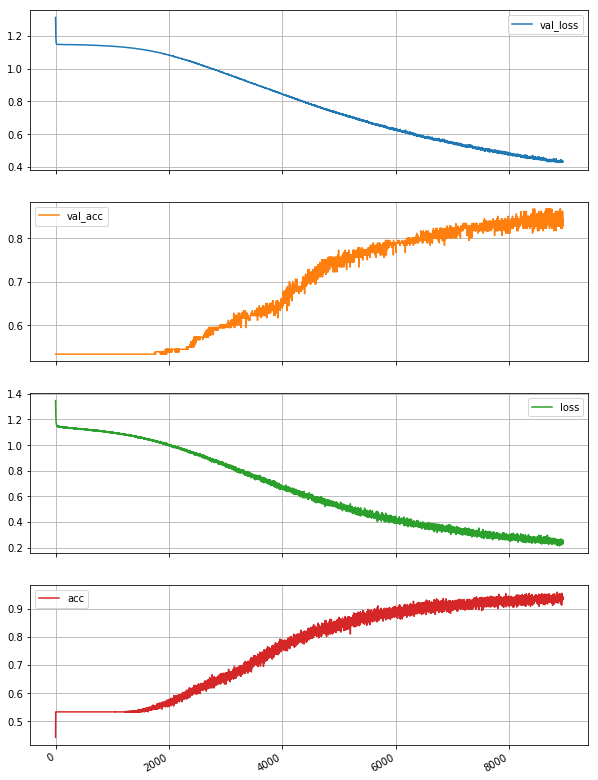

In [37]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [55]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

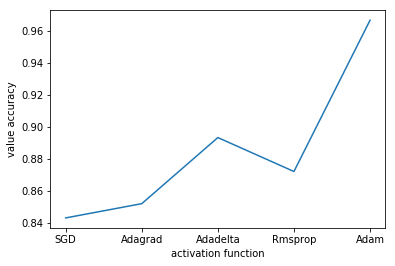

In [57]:
import matplotlib.pyplot as plt
import numpy as np

y = [0.8432,0.8521,0.8934,0.8722,0.9667]
x = ["SGD", "Adagrad", "Adadelta", "Rmsprop","Adam"]
plt.ylabel('value accuracy')
plt.xlabel('activation function')
plt.plot(x,y)
plt.show()

In [56]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "vgawade")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50290596")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 7  Correct :93
Testing Accuracy: 93.0
